# <center>实验4 主成分分析与决策树分类器</center>

基于鸢（yuan1）尾花数据集进行主成分分析，选择合适的主成分个数，并展示降维后的结果。<br>

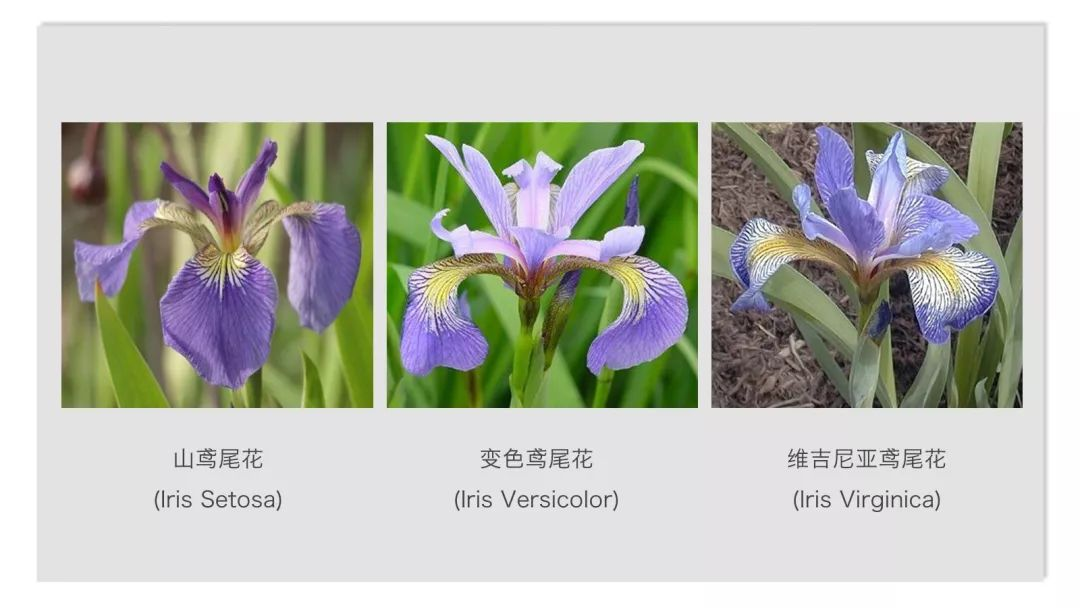
鸢尾花数据集包含了150条鸢尾花的数据，分为3类，每类50条数据，每条数据包含“花萼长度”、“花萼宽度”、“花瓣长度”、“花瓣宽度”四种属性。<br>
选取每个种类中各三条数据作为示例，如表1所示：
<center>表1 鸢尾花数据集部分示例</center>
<center>
<table>
  <tr>
    <td>
      <p>&nbsp;</p>
    </td>
    <td>
      <p>Sepal.Length</p>
    </td>
    <td>
      <p>Sepal.Width</p>
    </td>
    <td>
      <p>Petal.Length</p>
    </td>
    <td>
      <p>Petal.Width</p>
    </td>
    <td>
      <p>Species</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>1</p>
    </td>
    <td>
      <p>5.1</p>
    </td>
    <td>
      <p>3.5</p>
    </td>
    <td>
      <p>1.4</p>
    </td>
    <td>
      <p>0.2</p>
    </td>
    <td>
      <p>setosa</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>2</p>
    </td>
    <td>
      <p>4.9</p>
    </td>
    <td>
      <p>3</p>
    </td>
    <td>
      <p>1.4</p>
    </td>
    <td>
      <p>0.2</p>
    </td>
    <td>
      <p>setosa</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>3</p>
    </td>
    <td>
      <p>4.7</p>
    </td>
    <td>
      <p>3.2</p>
    </td>
    <td>
      <p>1.3</p>
    </td>
    <td>
      <p>0.2</p>
    </td>
    <td>
      <p>setosa</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>4</p>
    </td>
    <td>
      <p>7</p>
    </td>
    <td>
      <p>3.2</p>
    </td>
    <td>
      <p>4.7</p>
    </td>
    <td>
      <p>1.4</p>
    </td>
    <td>
      <p>versicolor</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>5</p>
    </td>
    <td>
      <p>6.4</p>
    </td>
    <td>
      <p>3.2</p>
    </td>
    <td>
      <p>4.5</p>
    </td>
    <td>
      <p>1.5</p>
    </td>
    <td>
      <p>versicolor</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>6</p>
    </td>
    <td>
      <p>6.9</p>
    </td>
    <td>
      <p>3.1</p>
    </td>
    <td>
      <p>4.9</p>
    </td>
    <td>
      <p>1.5</p>
    </td>
    <td>
      <p>versicolor</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>7</p>
    </td>
    <td>
      <p>6.3</p>
    </td>
    <td>
      <p>3.3</p>
    </td>
    <td>
      <p>6</p>
    </td>
    <td>
      <p>2.5</p>
    </td>
    <td>
      <p>virginica</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>8</p>
    </td>
    <td>
      <p>5.8</p>
    </td>
    <td>
      <p>2.7</p>
    </td>
    <td>
      <p>5.1</p>
    </td>
    <td>
      <p>1.9</p>
    </td>
    <td>
      <p>virginica</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>9</p>
    </td>
    <td>
      <p>7.1</p>
    </td>
    <td>
      <p>3</p>
    </td>
    <td>
      <p>5.9</p>
    </td>
    <td>
      <p>2.1</p>
    </td>
    <td>
      <p>virginica</p>
    </td>
  </tr>
</table>
</center>



 

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = pd.read_csv('data\iris.csv')  #读取数据文件
data = iris.iloc[:, :4]  #获得样本数据

target = iris.iloc[:,-1].values   #获得样本的类标签


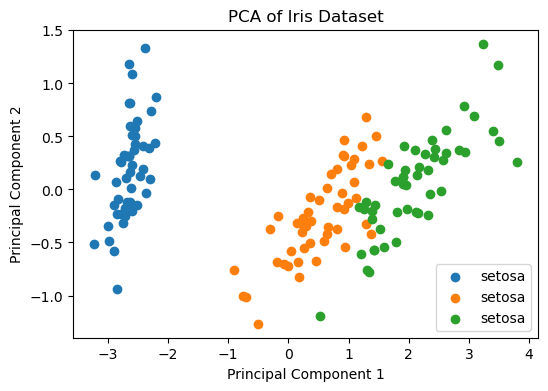

In [4]:

# 执行PCA操作
pca = PCA(n_components=2)  # 只保留2个主成分
data_pca = pca.fit_transform(data)  #PCA处理过的数据，为一个arrary

# 可视化PCA处理过的数据
plt.figure(figsize=(6, 4))
for label in np.unique(target):
    plt.scatter(data_pca[target == label, 0], data_pca[target == label, 1], label=label)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(target)
plt.show()

In [3]:
#采用熵作为不纯性度量的决策树分类器
import numpy as np

class DecisionTree:
    def __init__(self):
        pass
    
    def entropy(self, y):      #计算熵
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = np.mean(y == cls)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def information_gain(self, X, y, feature_idx, threshold):     #计算信息增益
        parent_entropy = self.entropy(y)
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = ~left_idxs
        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
            return 0
        left_entropy = self.entropy(y[left_idxs])
        right_entropy = self.entropy(y[right_idxs])
        child_entropy = np.mean(left_idxs) * left_entropy + np.mean(right_idxs) * right_entropy
        return parent_entropy - child_entropy
    
    def find_best_split(self, X, y):     #找出最优划分
        best_gain = 0
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        return best_feature_idx, best_threshold
    
    def fit(self, X, y):             #拟合数据
        if len(np.unique(y)) == 1:
            return {'class': y[0]}
        else:
            best_feature_idx, best_threshold = self.find_best_split(X, y)
            left_idxs = X[:, best_feature_idx] < best_threshold
            right_idxs = ~left_idxs
            tree = {
                'feature_idx': best_feature_idx,
                'threshold': best_threshold,
                'left': self.fit(X[left_idxs], y[left_idxs]),
                'right': self.fit(X[right_idxs], y[right_idxs])
            }
            return tree
    
    def predict_sample(self, sample, tree):
        if 'class' in tree:
            return tree['class']
        else:
            if sample[tree['feature_idx']] < tree['threshold']:
                return self.predict_sample(sample, tree['left'])
            else:
                return self.predict_sample(sample, tree['right'])
    
    def predict(self, X, tree):
        return [self.predict_sample(sample, tree) for sample in X]




In [4]:
from sklearn.model_selection import train_test_split


# 将PCA处理过的数据分成训练数据和测试数据,80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2, random_state=42)

dt = DecisionTree()
tree = dt.fit(X_train, y_train)

#输出训练好的树
print(tree)


# 预测
y_pred = dt.predict(X_test,tree)



{'feature_idx': 0, 'threshold': -0.9064698649488334, 'left': {'class': 'setosa'}, 'right': {'feature_idx': 0, 'threshold': 1.1693263393415014, 'left': {'feature_idx': 1, 'threshold': -1.0122482275317144, 'left': {'feature_idx': 0, 'threshold': 0.5212322439097757, 'left': {'class': 'versicolor'}, 'right': {'class': 'virginica'}}, 'right': {'class': 'versicolor'}}, 'right': {'feature_idx': 0, 'threshold': 1.5859282238732226, 'left': {'feature_idx': 1, 'threshold': 0.2674954473102547, 'left': {'feature_idx': 0, 'threshold': 1.3887661316914666, 'left': {'feature_idx': 0, 'threshold': 1.3800264359155123, 'left': {'feature_idx': 0, 'threshold': 1.298183875358915, 'left': {'class': 'virginica'}, 'right': {'feature_idx': 0, 'threshold': 1.3007917126376585, 'left': {'class': 'versicolor'}, 'right': {'class': 'virginica'}}}, 'right': {'class': 'versicolor'}}, 'right': {'class': 'virginica'}}, 'right': {'class': 'versicolor'}}, 'right': {'class': 'virginica'}}}}


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# 评估分类器的性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(target)))

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



实验要求：将上述决策树的算法中不纯性度量改为基尼指数，重构算法，完成数据的训练和测试。

In [5]:
#采用基尼系数作为不纯性度量的决策树分类器
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


class DecisionTreeGini:
    def __init__(self):
        pass
    
    def gini(self, y):      #计算基尼系数 gini = 1 - \sum p_i^2
        classes = np.unique(y)
        gini = 1
        for cls in classes:
            p_cls = np.mean(y == cls)
            gini -= p_cls ** 2 
        return gini
    
    def information_gain(self, X, y, feature_idx, threshold):     #计算信息增益
        parent_gini = self.gini(y)
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = ~left_idxs
        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
            return 0
        left_gini = self.gini(y[left_idxs])
        right_gini = self.gini(y[right_idxs])
        child_gini = np.mean(left_idxs) * left_gini + np.mean(right_idxs) * right_gini
        return parent_gini - child_gini
    
    def find_best_split(self, X, y):     #找出最优划分
        best_gain = 0
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        return best_feature_idx, best_threshold
    
    def fit(self, X, y):             #拟合数据
        if len(np.unique(y)) == 1:
            return {'class': y[0]}
        else:
            best_feature_idx, best_threshold = self.find_best_split(X, y)
            left_idxs = X[:, best_feature_idx] < best_threshold
            right_idxs = ~left_idxs
            tree = {
                'feature_idx': best_feature_idx,
                'threshold': best_threshold,
                'left': self.fit(X[left_idxs], y[left_idxs]),
                'right': self.fit(X[right_idxs], y[right_idxs])
            }
            return tree
    
    def predict_sample(self, sample, tree):
        if 'class' in tree:
            return tree['class']
        else:
            if sample[tree['feature_idx']] < tree['threshold']:
                return self.predict_sample(sample, tree['left'])
            else:
                return self.predict_sample(sample, tree['right'])
    
    def predict(self, X, tree):
        return [self.predict_sample(sample, tree) for sample in X]

    
# 将PCA处理过的数据分成训练数据和测试数据,80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2, random_state=42)

dtg = DecisionTreeGini()
tree = dtg.fit(X_train, y_train)

#输出训练好的树
print(tree)


# 预测
y_pred = dtg.predict(X_test,tree)

# 评估分类器的性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(target)))

{'feature_idx': 0, 'threshold': -0.9064698649488334, 'left': {'class': 'setosa'}, 'right': {'feature_idx': 0, 'threshold': 1.1693263393415014, 'left': {'feature_idx': 1, 'threshold': -1.0122482275317144, 'left': {'feature_idx': 0, 'threshold': 0.5212322439097757, 'left': {'class': 'versicolor'}, 'right': {'class': 'virginica'}}, 'right': {'class': 'versicolor'}}, 'right': {'feature_idx': 0, 'threshold': 1.5859282238732226, 'left': {'feature_idx': 1, 'threshold': 0.2674954473102547, 'left': {'feature_idx': 0, 'threshold': 1.3887661316914666, 'left': {'feature_idx': 0, 'threshold': 1.3800264359155123, 'left': {'feature_idx': 0, 'threshold': 1.298183875358915, 'left': {'class': 'virginica'}, 'right': {'feature_idx': 0, 'threshold': 1.3007917126376585, 'left': {'class': 'versicolor'}, 'right': {'class': 'virginica'}}}, 'right': {'class': 'versicolor'}}, 'right': {'class': 'virginica'}}, 'right': {'class': 'versicolor'}}, 'right': {'class': 'virginica'}}}}
Accuracy: 0.9666666666666667
Class

In [7]:
#可视化，除了导入这个包还需要在本地下载graphviz软件并配置环境变量
#对应的包中未提供直接用于绘图的可执行文件,因此需要本地安装对应的绘图软件
!pip install graphviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


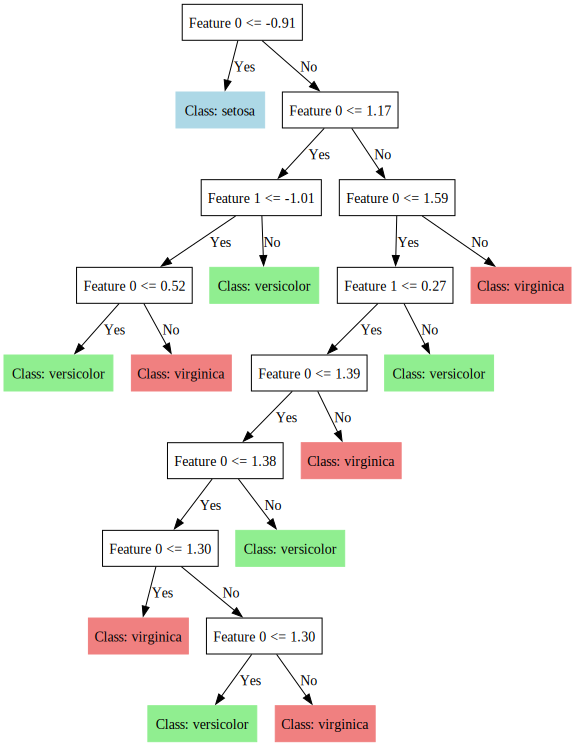

In [7]:
from graphviz import Digraph, Source

def visualize_tree(tree, parent=None, graph=None, node_id=None, leaf_colors=None):
    colors = ['lightblue', 'lightgreen', 'lightcoral', 
          'lightskyblue', 'lightpink', 'lightyellow']
    if leaf_colors is None:
        leaf_colors = {}
    if graph is None:
        graph = Digraph()
        graph.attr('node', shape='box')
    if node_id is None:
        node_id = '1'

    if 'class' in tree:  # Leaf node
        class_label = tree['class']
        if class_label not in leaf_colors:
            leaf_colors[class_label] = colors[len(leaf_colors) % len(colors)]
        graph.node(node_id, label=f'Class: {class_label}'
                   , color=leaf_colors[class_label], style='filled')
    else:  # Decision node
        feature_idx = tree['feature_idx']
        threshold = tree['threshold']
        graph.node(node_id, label=f'Feature {feature_idx} <= {threshold:.2f}')

        left_child_id = f'{node_id}L'
        right_child_id = f'{node_id}R'

        graph.edge(node_id, left_child_id, label='Yes')
        graph.edge(node_id, right_child_id, label='No')

        visualize_tree(tree['left'], parent=node_id, graph=graph, 
                       node_id=left_child_id, leaf_colors=leaf_colors)
        visualize_tree(tree['right'], parent=node_id, graph=graph, 
                       node_id=right_child_id, leaf_colors=leaf_colors)

    if parent is None:
        return graph

# Visualize the decision tree
graph = visualize_tree(tree)
Source(graph.source)